In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sb

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import warnings
warnings.filterwarnings('ignore')

/home/johnbou/Desktop/udemy_ml/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
## the data are from https://www.kaggle.com/competitions/house_pricing/data

In [3]:
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_train.drop("Id", axis = 1, inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
df_test.drop('Id', axis = 1, inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [6]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# we concat we two sets, train and test to manipulate the missing values


In [8]:
df = pd.concat([df_train, df_test], axis = 0)
len(df)

2919

In [9]:
## the numerical values 


In [10]:
df.select_dtypes(include='number')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,NaN
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [11]:
## categorical values

In [12]:
df.select_dtypes(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


## Data Analysis

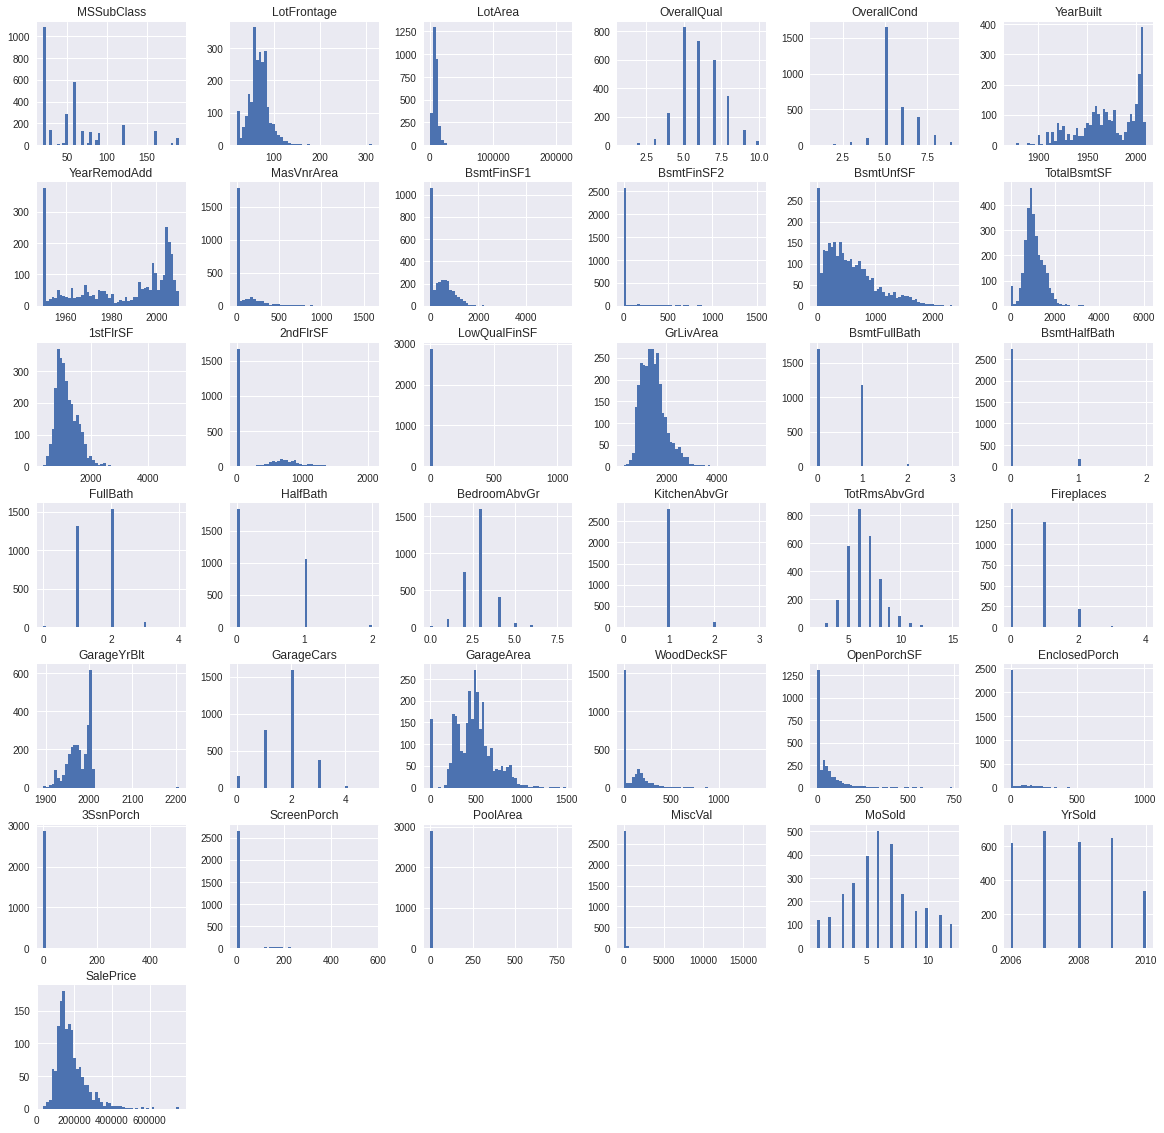

In [13]:
df.hist(bins=50, figsize = (20,20));

In [14]:
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

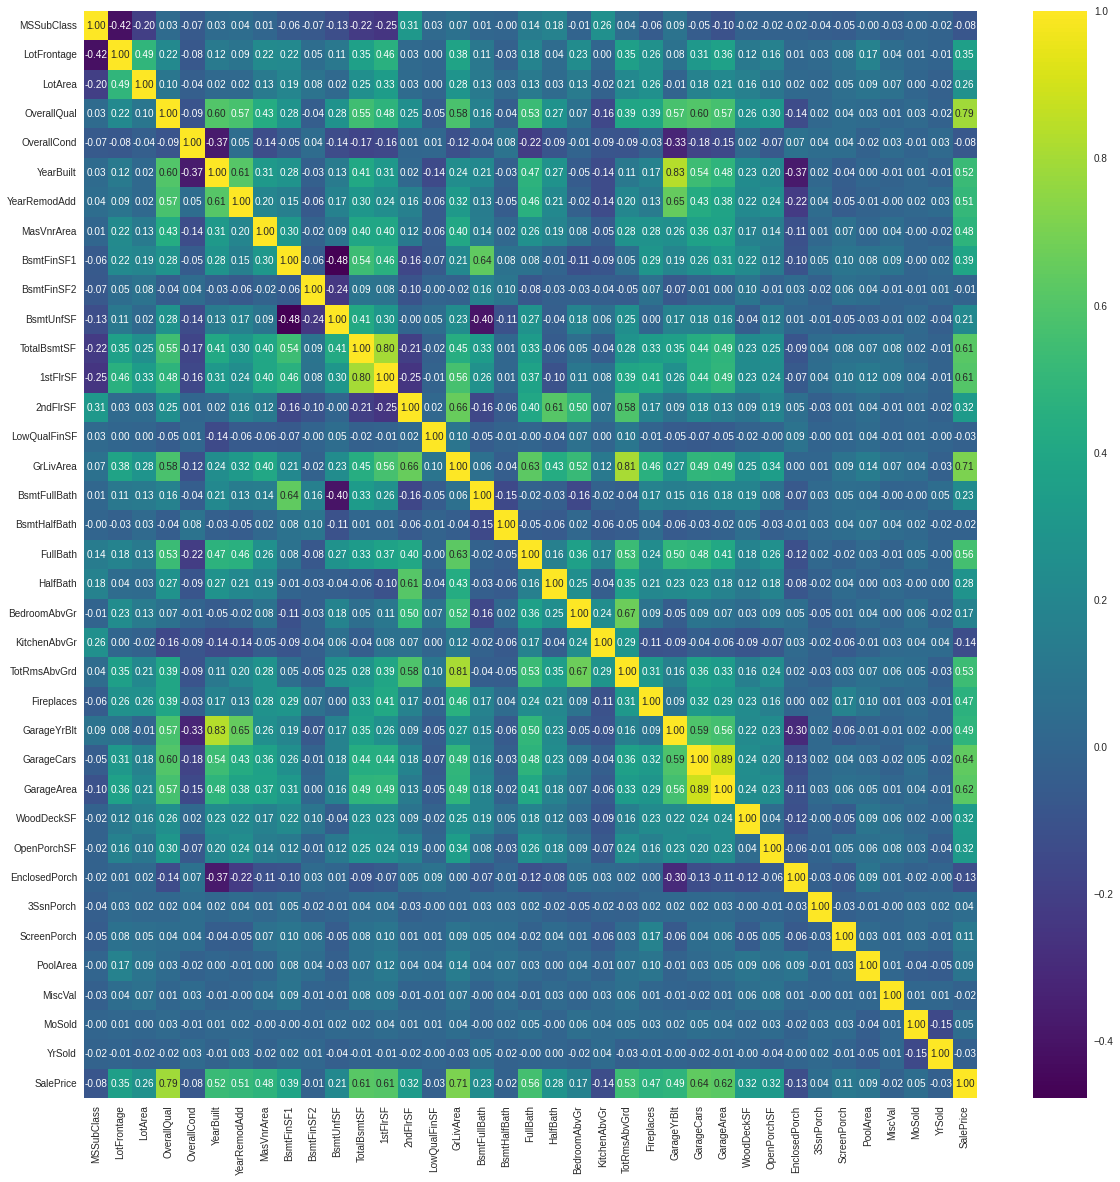

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (20,20))
ax = sb.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'viridis')

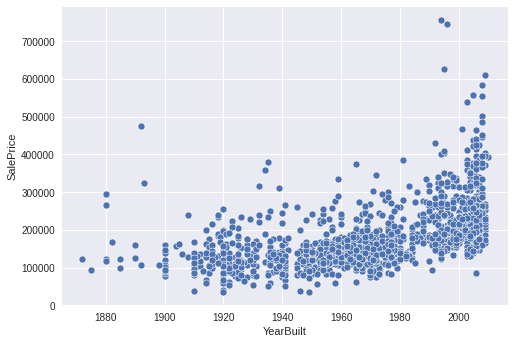

In [16]:
fig, ax = plt.subplots()
ax = sb.scatterplot(df.YearBuilt, df.SalePrice)

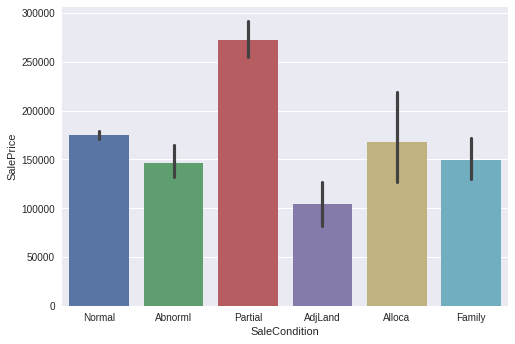

In [17]:
fig, ax = plt.subplots()
ax = sb.barplot(df.SaleCondition, df.SalePrice)

In [18]:
## Fill the missing values

In [19]:
num = list(df.select_dtypes(include='number'))
categ = list(df.select_dtypes(exclude = 'number'))

In [20]:
df[num]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,NaN
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [21]:
df[categ]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [22]:
## calculate the null percentage on each column

In [23]:
def cal_null_percentage(df):
    na_count = df.isna().sum().sort_values(ascending = False)
    na_percentage = (na_count/len(df))*100
    d_types = df.dtypes
    df_info = pd.concat([na_count, na_percentage, d_types],axis = 1, keys=['Null', 'Percentage of Null (%)', 'Types'])
    return df_info[df_info['Null']>0]

In [24]:
cal_null_percentage(df)

,Null,Percentage of Null (%),Types
PoolQC,2909,99.657417,object
MiscFeature,2814,96.402878,object
Alley,2721,93.216855,object
Fence,2348,80.438506,object
SalePrice,1459,49.982871,float64
FireplaceQu,1420,48.646797,object
LotFrontage,486,16.649538,float64
GarageCond,159,5.447071,object
GarageFinish,159,5.447071,object
GarageQual,159,5.447071,object


In [25]:
## manage the categorical na

In [26]:
df[categ] = df[categ].fillna('None')

In [27]:
# check for missing categorical 

In [28]:
cal_null_percentage(df[categ])

,Null,Percentage of Null (%),Types


### Manage the numerical ones

In [30]:
num_featues_na = cal_null_percentage(df[num]).index.values

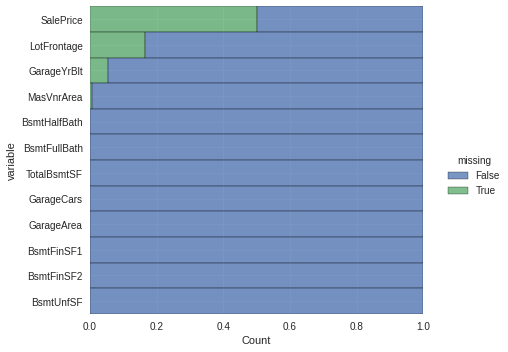

In [31]:
sb.displot(data=df[num_featues_na].isna().melt(value_name='missing'),
               y = 'variable',
               hue= 'missing',
               multiple = 'fill',
               aspect = 1.25);

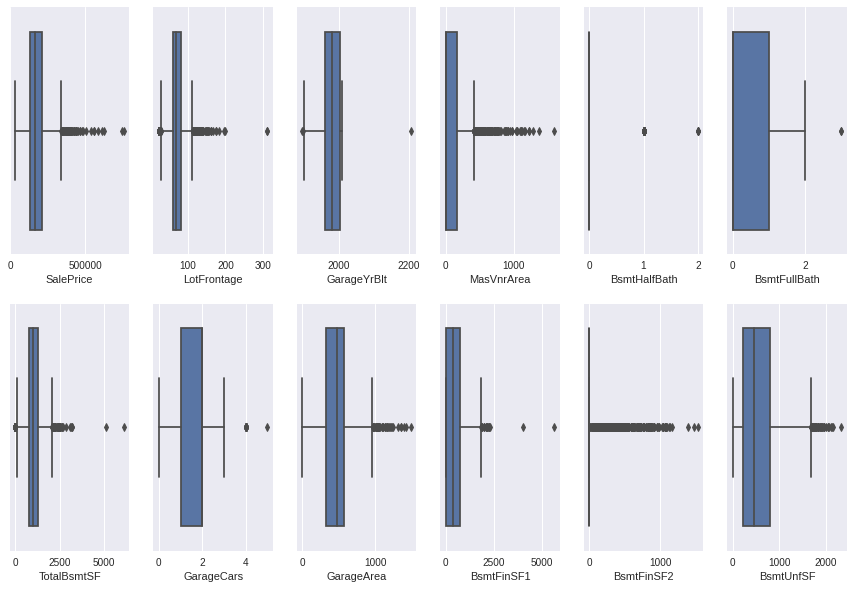

In [32]:
rows = 2
cols = math.ceil(len(num_featues_na)/2)
fig = plt.figure(figsize=(15,10))
for i, col in enumerate (num_featues_na):
    ax = fig.add_subplot(rows, cols, i+1)
    sb.boxplot(df[col], ax = ax)

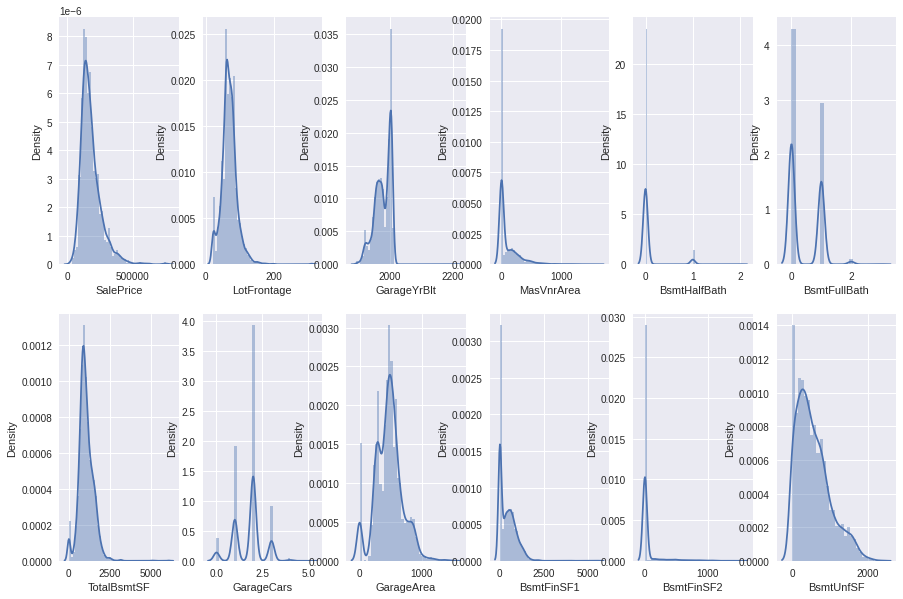

In [33]:
rows = 2
cols = math.ceil(len(num_featues_na)/2)
fig = plt.figure(figsize=(15,10))
for i, col in enumerate (num_featues_na):
    ax = fig.add_subplot(rows, cols, i+1)
    sb.distplot(df[col], ax = ax)

In [34]:
for i in num:
    df.fillna(df[i].median(), inplace = True)

### Check for na values

In [36]:
cal_null_percentage(df)

,Null,Percentage of Null (%),Types


### Find all the categories in columns

In [38]:
for col in df.select_dtypes(exclude = 'number'):
    print(df[col].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH' 'None']
['Pave' 'Grvl']
['None' 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa' 'None']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'None']
['Vin

## encoding with pandas

In [40]:
df.drop('SalePrice', axis = 1, inplace = True)

In [41]:
df_enconding = pd.get_dummies(df)
df_enconding

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [42]:
Train_data = df_enconding.iloc[0:1460]
Test_data = df_enconding.iloc[1460:]


In [43]:
len(Train_data), len(Test_data)

(1460, 1459)

## Scaling

In [45]:
Train_data_norm = StandardScaler().fit(Train_data).transform(Train_data.astype(float))
Test_data_norm = StandardScaler().fit(Test_data).transform(Test_data.astype(float))

## Metrics
### Fit the data

In [47]:
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col=False)
y = df_train.SalePrice

In [48]:
models = {'RandomForestRegressor':RandomForestRegressor(),
         'GradientBoostRegressor':GradientBoostingRegressor(),
         'KNRegressor':KNeighborsRegressor(),
         'Ridge':Ridge(),
         'CatBoostRegressor':CatBoostRegressor(),
         'XGBRFRegressor': XGBRFRegressor(),
         'LGBMRegressor': LGBMRegressor()}

In [49]:
def fit_and_score(X,y,models):
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)
    model_scores  = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        MAE = mean_absolute_error(y_test, y_preds)
        RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
        R2 = r2_score(y_test, y_preds)        
        model_scores[name]= [model.score(X_test, y_test),MAE,RMSE,R2]

    return model_scores

models_scores =fit_and_score(Train_data_norm,y,models)

Learning rate set to 0.04196
0:	learn: 75223.3443988	total: 51ms	remaining: 50.9s
1:	learn: 73084.5102591	total: 53.5ms	remaining: 26.7s
2:	learn: 71219.6893090	total: 55.4ms	remaining: 18.4s
3:	learn: 69516.0185056	total: 57.2ms	remaining: 14.2s
4:	learn: 67881.2782273	total: 62.8ms	remaining: 12.5s
5:	learn: 66275.1523016	total: 65.3ms	remaining: 10.8s
6:	learn: 64765.4413942	total: 67.3ms	remaining: 9.54s
7:	learn: 63138.0919646	total: 69ms	remaining: 8.56s
8:	learn: 61565.0037779	total: 70.9ms	remaining: 7.81s
9:	learn: 60180.3005487	total: 72.7ms	remaining: 7.2s
10:	learn: 58770.0773383	total: 74.7ms	remaining: 6.71s
11:	learn: 57495.7937704	total: 76.7ms	remaining: 6.31s
12:	learn: 56281.7361190	total: 78.7ms	remaining: 5.97s
13:	learn: 55057.0660923	total: 80.7ms	remaining: 5.68s
14:	learn: 54001.3901119	total: 82.6ms	remaining: 5.42s
15:	learn: 52813.3075300	total: 84.5ms	remaining: 5.2s
16:	learn: 51758.2019446	total: 86.4ms	remaining: 5s
17:	learn: 50669.0156203	total: 88.3ms

156:	learn: 18527.3958235	total: 380ms	remaining: 2.04s
157:	learn: 18497.0888406	total: 382ms	remaining: 2.04s
158:	learn: 18457.1402835	total: 384ms	remaining: 2.03s
159:	learn: 18383.2829046	total: 386ms	remaining: 2.03s
160:	learn: 18311.1540310	total: 388ms	remaining: 2.02s
161:	learn: 18261.2094420	total: 390ms	remaining: 2.02s
162:	learn: 18215.8986531	total: 392ms	remaining: 2.01s
163:	learn: 18167.1627033	total: 394ms	remaining: 2.01s
164:	learn: 18141.5243585	total: 396ms	remaining: 2s
165:	learn: 18094.0981945	total: 398ms	remaining: 2s
166:	learn: 18059.3769260	total: 400ms	remaining: 1.99s
167:	learn: 18004.0271042	total: 402ms	remaining: 1.99s
168:	learn: 17974.4044435	total: 403ms	remaining: 1.98s
169:	learn: 17942.7257461	total: 405ms	remaining: 1.98s
170:	learn: 17900.2339381	total: 407ms	remaining: 1.97s
171:	learn: 17860.3624607	total: 410ms	remaining: 1.97s
172:	learn: 17837.9255855	total: 411ms	remaining: 1.96s
173:	learn: 17824.3340753	total: 413ms	remaining: 1.96

374:	learn: 12156.5469388	total: 761ms	remaining: 1.27s
375:	learn: 12136.0678986	total: 763ms	remaining: 1.26s
376:	learn: 12109.6468799	total: 765ms	remaining: 1.26s
377:	learn: 12098.0553931	total: 766ms	remaining: 1.26s
378:	learn: 12075.8106185	total: 768ms	remaining: 1.26s
379:	learn: 12048.6198647	total: 770ms	remaining: 1.26s
380:	learn: 12029.7173295	total: 772ms	remaining: 1.25s
381:	learn: 12005.6468372	total: 774ms	remaining: 1.25s
382:	learn: 11989.3925425	total: 776ms	remaining: 1.25s
383:	learn: 11970.2037373	total: 778ms	remaining: 1.25s
384:	learn: 11967.9056953	total: 781ms	remaining: 1.25s
385:	learn: 11945.7631990	total: 783ms	remaining: 1.25s
386:	learn: 11934.0845662	total: 785ms	remaining: 1.24s
387:	learn: 11914.2601384	total: 786ms	remaining: 1.24s
388:	learn: 11884.3600161	total: 788ms	remaining: 1.24s
389:	learn: 11864.9472875	total: 790ms	remaining: 1.24s
390:	learn: 11835.0679737	total: 792ms	remaining: 1.23s
391:	learn: 11813.1325877	total: 794ms	remaining

552:	learn: 9300.9885459	total: 1.15s	remaining: 931ms
553:	learn: 9287.5957407	total: 1.16s	remaining: 932ms
554:	learn: 9279.6188355	total: 1.16s	remaining: 931ms
555:	learn: 9264.3284822	total: 1.16s	remaining: 929ms
556:	learn: 9262.7117852	total: 1.17s	remaining: 927ms
557:	learn: 9249.4782618	total: 1.17s	remaining: 925ms
558:	learn: 9234.1296979	total: 1.17s	remaining: 923ms
559:	learn: 9223.1070627	total: 1.17s	remaining: 921ms
560:	learn: 9216.2343444	total: 1.17s	remaining: 919ms
561:	learn: 9200.2328129	total: 1.18s	remaining: 917ms
562:	learn: 9189.2800644	total: 1.18s	remaining: 915ms
563:	learn: 9173.9501133	total: 1.18s	remaining: 913ms
564:	learn: 9158.6156130	total: 1.18s	remaining: 910ms
565:	learn: 9156.4503903	total: 1.18s	remaining: 908ms
566:	learn: 9144.6059875	total: 1.19s	remaining: 907ms
567:	learn: 9126.1707476	total: 1.19s	remaining: 905ms
568:	learn: 9108.0614490	total: 1.19s	remaining: 903ms
569:	learn: 9088.0762805	total: 1.19s	remaining: 901ms
570:	learn

732:	learn: 7357.8821967	total: 1.53s	remaining: 559ms
733:	learn: 7350.5970308	total: 1.54s	remaining: 557ms
734:	learn: 7345.2928570	total: 1.54s	remaining: 555ms
735:	learn: 7335.2082623	total: 1.54s	remaining: 553ms
736:	learn: 7322.2863044	total: 1.54s	remaining: 550ms
737:	learn: 7318.2246191	total: 1.54s	remaining: 548ms
738:	learn: 7309.3624079	total: 1.55s	remaining: 547ms
739:	learn: 7298.9987934	total: 1.55s	remaining: 545ms
740:	learn: 7289.7054040	total: 1.55s	remaining: 543ms
741:	learn: 7285.8291419	total: 1.55s	remaining: 541ms
742:	learn: 7281.6184009	total: 1.56s	remaining: 539ms
743:	learn: 7269.8675861	total: 1.56s	remaining: 537ms
744:	learn: 7260.0649624	total: 1.56s	remaining: 534ms
745:	learn: 7249.1389785	total: 1.56s	remaining: 532ms
746:	learn: 7244.7013931	total: 1.56s	remaining: 530ms
747:	learn: 7235.1230783	total: 1.57s	remaining: 528ms
748:	learn: 7231.4090655	total: 1.57s	remaining: 526ms
749:	learn: 7222.6459621	total: 1.57s	remaining: 524ms
750:	learn

920:	learn: 6024.6487566	total: 1.92s	remaining: 164ms
921:	learn: 6015.1678786	total: 1.92s	remaining: 162ms
922:	learn: 6005.9828610	total: 1.92s	remaining: 160ms
923:	learn: 6002.2265353	total: 1.92s	remaining: 158ms
924:	learn: 5995.7995155	total: 1.92s	remaining: 156ms
925:	learn: 5988.6322052	total: 1.93s	remaining: 154ms
926:	learn: 5985.2108266	total: 1.93s	remaining: 152ms
927:	learn: 5977.6786083	total: 1.93s	remaining: 150ms
928:	learn: 5968.2848277	total: 1.93s	remaining: 148ms
929:	learn: 5959.9077727	total: 1.93s	remaining: 145ms
930:	learn: 5951.7038244	total: 1.93s	remaining: 143ms
931:	learn: 5942.0645036	total: 1.94s	remaining: 141ms
932:	learn: 5939.4589616	total: 1.94s	remaining: 139ms
933:	learn: 5932.5061018	total: 1.94s	remaining: 137ms
934:	learn: 5929.2817335	total: 1.94s	remaining: 135ms
935:	learn: 5925.8079195	total: 1.95s	remaining: 133ms
936:	learn: 5918.2797226	total: 1.95s	remaining: 131ms
937:	learn: 5914.6769394	total: 1.95s	remaining: 129ms
938:	learn

In [50]:
models_scores


{'RandomForestRegressor': [0.886591336323404,
  17809.42102739726,
  29493.752645614026,
  0.886591336323404],
 'GradientBoostRegressor': [0.9001638281031751,
  17344.87235339226,
  27672.65808926665,
  0.9001638281031751],
 'KNRegressor': [0.7519339624344564,
  24968.67397260274,
  43620.49322339277,
  0.7519339624344564],
 'Ridge': [0.8841506288773242,
  18687.158486140284,
  29809.435878734894,
  0.8841506288773242],
 'CatBoostRegressor': [0.9117266070685607,
  15510.63190545719,
  26020.870838604642,
  0.9117266070685607],
 'XGBRFRegressor': [0.881272497080434,
  19775.634631849316,
  30177.45312576649,
  0.881272497080434],
 'LGBMRegressor': [0.8878521091470079,
  17082.568157900947,
  29329.352299197937,
  0.8878521091470079]}

## RandomForestRegressor

In [53]:
# np.random.seed(42)
# grid = {'n_estimators': np.arange(100, 1100, 200),
#        'max_depth':[None, 5, 10, 15],
#        'min_samples_split':[2,4],
#        'min_samples_leaf':[1,2]}
# X_train, X_test, y_train, y_test = train_test_split(Train_data_norm, y, test_size = 0.2, shuffle=True, random_state=42)

# clf_RFR = GridSearchCV(estimator=RandomForestRegressor(),
#                       param_grid=grid, 
#                       n_jobs=4,
#                       verbose = 0, cv =5
#                       )
# clf_RFR.fit(X_train, y_train)
# pickle.dump(clf_RFR, open('RandonForestRegressor_GridSearchCV.pkl','wb'))

In [54]:
clf_RFR = pickle.load(open('RandonForestRegressor_GridSearchCV.pkl','rb'))

In [55]:
clf_RFR.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [56]:
clf_RFR.score(X_test, y_test)

0.8883966277747155

In [57]:
preds_RDF = clf_RFR.predict(X_test)

In [58]:
mean_absolute_error(y_test,preds_RDF), np.sqrt(mean_squared_error(y_test,preds_RDF)), r2_score(y_test,preds_RDF)

(17512.04673608572, 29258.0633465385, 0.8883966277747155)

## GradientBoostRegressor

In [60]:
# np.random.seed(42)
# grid = {'n_estimators':np.arange(100,1100,100),
#         'criterion'   : ['friedman_mse', 'squared_error'],
#        'max_depth':[2,3,4],
#        'max_features':['None', 'auto']}

X_train, X_test, y_train, y_test = train_test_split(Train_data_norm, y, test_size = 0.2, shuffle=True, random_state=42)

# clf_GBC = GridSearchCV(estimator=GradientBoostingRegressor(),
#                       param_grid=grid,
#                       n_jobs =4,
#                       verbose= 0, cv =5)
# clf_GBC.fit(X_train,y_train)

# pickle.dump(clf_GBC, open('clf_GBC.pkl', 'wb'))

In [61]:
clf_GBC = pickle.load(open('clf_GBC.pkl','rb'))

In [62]:
clf_GBC.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 400}

In [63]:
clf_GBC.score(X_test,y_test)

0.889608951150761

In [64]:
preds_GBC = clf_GBC.predict(X_test)

In [65]:
mean_absolute_error(y_test,preds_GBC), np.sqrt(mean_squared_error(y_test,preds_GBC)), r2_score(y_test,preds_GBC)

(16960.566702447817, 29098.717412064616, 0.889608951150761)

## KNeighborsRegressor

In [67]:
# np.random.seed(42)
# grid = {'n_neighbors': list(range(3,11)),
#        'algorithm': ['auto', 'ball_tree', 'kd_tree'], 
#        'leaf_size':list(range(10,60))}
X_train, X_test, y_train, y_test = train_test_split(Train_data_norm, y, test_size = 0.2, shuffle=True, random_state=42)

# clf_KNR = GridSearchCV(estimator=KNeighborsRegressor(), 
#                       param_grid=grid,
#                       n_jobs=4, 
#                       cv =5,
#                       verbose=0)
# clf_KNR.fit(X_train, y_train)
# pickle.dump(clf_KNR, open('clf_KNR.pkl','wb'))


In [68]:
clf_KNR = pickle.load(open('clf_KNR.pkl','rb'))

In [69]:
clf_KNR.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9}

In [70]:
clf_KNR.score(X_test, y_test)

0.7544455211157941

In [71]:
preds_KNR = clf_KNR.predict(X_test)

In [72]:
mean_absolute_error(y_test,preds_KNR), np.sqrt(mean_squared_error(y_test,preds_KNR)), r2_score(y_test,preds_KNR)

(25183.549086757987, 43399.11237200251, 0.7544455211157941)

## CatBoostRegressor

In [60]:
# grid = {'iterations': list(range(100, 1000,100)),
#         'depth': [2, 4, 6, 8],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]}
# X_train, X_test, y_train, y_test = train_test_split(Train_data_norm, y, test_size = 0.2, shuffle=True, random_state=42)
# CBR = CatBoostRegressor()
# clf_CBR = GridSearchCV(estimator=CBR,
#                       param_grid=grid,
#                       cv = 5, verbose = 0, n_jobs =4)
# clf_CBR.fit(X_train, y_train)
# pickle.dump(clf_CBR, open('clf_CBR.pkl','wb'))

In [75]:
clf_CBR = pickle.load(open('clf_CBR.pkl','rb'))

In [76]:
clf_CBR.best_params_

{'depth': 4, 'iterations': 900, 'l2_leaf_reg': 0.2}

In [77]:
preds_CBR = clf_CBR.predict(X_test)

In [78]:
mean_absolute_error(y_test,preds_CBR), np.sqrt(mean_squared_error(y_test,preds_CBR)), r2_score(y_test,preds_CBR)

(10505.058715338675, 18763.39852342632, 0.9541003714002371)

In [ ]:
#=================================================================================

## XGBRFRegressor

In [81]:
# np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(Train_data_norm, y, test_size = 0.2, shuffle=True, random_state=42)

# grid = {      'learning_rate': [0.01, 0.02, 0.03, 0.05], #so called `eta` value
#               'max_depth': [5, 6, 10, 50],
#               'n_estimators': list(range(100,1000,100)),
#                'colsample_bytree': [0.7, 1.0]}

# clf_XGBRFR = GridSearchCV(estimator=XGBRFRegressor(),
#                          param_grid=grid, 
#                          n_jobs=4,
#                          verbose = 0)
# clf_XGBRFR.fit(X_train, y_train)
# pickle.dump(clf_XGBRFR, open('clf_XGBRFR.pkl','wb'))

In [80]:
clf_XGBRFR = pickle.load(open('clf_XGBRFR.pkl','rb'))

In [82]:
clf_XGBRFR.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 50,
 'n_estimators': 200}

In [83]:
preds_XGBRFR = clf_XGBRFR.predict(X_test)

In [84]:
mean_absolute_error(y_test,preds_XGBRFR), np.sqrt(mean_squared_error(y_test,preds_XGBRFR)), r2_score(y_test,preds_XGBRFR)

(169945.83664065844, 189568.38809521258, -3.6850906720687844)

## LGBMRegressor

In [86]:
# np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(Train_data_norm, y, test_size = 0.2, shuffle=True, random_state=42)

# grid = {'n_estimators': list(range(100,1000,100)),
#         'num_leaves':[11,21, 31, 41],
#         'learning_rate':[0.1, 0.3, 0.6],
#         'n_jobs':[4]}
# clf_LGBMR = GridSearchCV(estimator=LGBMRegressor(), param_grid=grid)
# clf_LGBMR.fit(X_train, y_train)
# pickle.dump(clf_LGBMR, open('clf_LGBMR.pkl','wb'))

In [87]:
clf_LGBMR = pickle.load(open('clf_LGBMR.pkl','rb'))

In [88]:
clf_LGBMR.best_params_

{'learning_rate': 0.1, 'n_estimators': 900, 'n_jobs': 4, 'num_leaves': 11}

In [89]:
preds_LGBMR = clf_LGBMR.predict(X_test)

In [90]:
mean_absolute_error(y_test,preds_LGBMR), np.sqrt(mean_squared_error(y_test,preds_LGBMR)), r2_score(y_test,preds_LGBMR)

(16448.03316231327, 28334.732950931313, 0.8953294723439125)

## Save the models

In [92]:
df_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv', index_col=False)

In [93]:
preds_RDF = clf_RFR.predict(Test_data_norm)
solution_RDF = pd.DataFrame()
solution_RDF['Id'] = df_test['Id']
solution_RDF['SalePrice'] = preds_RDF
solution_RDF.to_csv('solution_RDF.csv',  index=False)

In [94]:
preds_LGBMR = clf_LGBMR.predict(Test_data_norm)
solution_LGBMR = pd.DataFrame()
solution_LGBMR['Id'] = df_test['Id']
solution_LGBMR['SalePrice'] = preds_LGBMR
solution_LGBMR.to_csv('solution_LGBMR.csv',  index=False)

In [95]:
preds_CBR = clf_CBR.predict(Test_data_norm)
solution_CBR = pd.DataFrame()
solution_CBR['Id'] = df_test['Id']
solution_CBR['SalePrice'] = preds_CBR
solution_CBR.to_csv('solution_CBR.csv',  index=False)

In [96]:
preds_XGBRFR = clf_XGBRFR.predict(Test_data_norm)
solution_XGBRFR = pd.DataFrame()
solution_XGBRFR['Id'] = df_test['Id']
solution_XGBRFR['SalePrice'] = preds_XGBRFR
solution_XGBRFR.to_csv('solution_XGBRFR.csv',  index=False)